In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# Data Ingestion

In [3]:
# Reading the EVs_by_Population raw csv file.
EVs_by_Population = pd.read_csv(r'/Users/graydx2/Downloads/Data Analytics Course/Electric_Vehicle_Population_Data.csv')

In [4]:
# Dataset Information 

In [5]:
# Checking the information in the dataset.
EVs_by_Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124716 entries, 0 to 124715
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Make              124716 non-null  object
 1   Model             124535 non-null  object
 2   County            124714 non-null  object
 3   City              124714 non-null  object
 4   State             124716 non-null  object
 5   Year              124716 non-null  int64 
 6   EV Type           124716 non-null  object
 7   Electric Range    124716 non-null  int64 
 8   Vehicle ID        124716 non-null  int64 
 9   Vehicle Location  124687 non-null  object
 10  Electric Utility  124243 non-null  object
dtypes: int64(3), object(8)
memory usage: 10.5+ MB


In [6]:
# Illustrate the shape of the data file 
# Output is (Rows, Columns)

EVs_by_Population.shape

(124716, 11)

In [7]:
# Display the first 5 rows
# Column "EV Type” denotes the type of car, BE - Battery Electric Vehicle, PHEV – Plug-in Hybrid Electric Vehicle.
# Column “Electric Range” is in Kilometre per hour for the sake of this study.
# Population data is based on figures from the Washington state.

EVs_by_Population.head()

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
0,TESLA,MODEL 3,Yakima,Yakima,WA,2020,BEV,518,127175366,POINT (-120.56916 46.58514),PACIFICORP
1,TESLA,MODEL 3,San Diego,San Diego,CA,2019,BEV,354,266614659,POINT (-117.16171 32.71568),NaN
2,VOLVO,S60,Lane,Eugene,OR,2021,PHEV,35,144502018,POINT (-123.12802 44.09573),NaN
3,TESLA,MODEL X,Yakima,Yakima,WA,2019,BEV,465,477039944,POINT (-120.56916 46.58514),PACIFICORP
4,BMW,X5,Snohomish,Bothell,WA,2017,PHEV,23,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC


In [8]:
# Display the Last 5 rows
# Column "EV Type” denotes the type of car, BEV - Battery Electric Vehicle, PHEV – Plug-in Hybrid Electric Vehicle.
# Column “Electric Range” is in Kilometre per hour for the sake of this study.
# Population data is based on figures from the Washington state. 

EVs_by_Population.tail()

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
124711,TESLA,MODEL 3,Snohomish,Monroe,WA,2022,BEV,0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC
124712,KIA,NIRO,Pierce,Tacoma,WA,2020,PHEV,42,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124713,TESLA,MODEL Y,Whatcom,Bellingham,WA,2023,BEV,0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
124714,CHEVROLET,BOLT EV,Pierce,Tacoma,WA,2018,BEV,383,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124715,CHEVROLET,VOLT,Benton,Benton City,WA,2015,PHEV,61,476974718,POINT (-119.48756 46.26543),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...


In [9]:
EVs_by_Population.columns
# Below are the descriptions of the column names:

# Make: Manufacturer of the vehicle
# Model: Model of vehicle released by the Manufacturer 
# County: County where the vehicle is currently located
# City: City where the vehicle is currently located
# State: State where the vehicle is currently located
# Year: Year the car was purchased
# EV Type: What type of propulsion technology utilised, Battery Electric Vehicle or Plug-in Hybrid Electric Vehicle.
# Electric Range: Electric Range of the vehicle.
# Vehicle ID: The vehicle identification number (VIN) is the identifying code for a Specific automobile.
# Vehicle Location: GPS coordinates for the vehicles.
# Electric Utility: The utility provider the vehicle owners are using.

Index(['Make', 'Model', 'County', 'City', 'State', 'Year', 'EV Type',
       'Electric Range', 'Vehicle ID', 'Vehicle Location', 'Electric Utility'],
      dtype='object')

In [10]:
# Outputting the Oldest vehicle.
# Outputting the newest vehicle.
# Mean age of vehicles .
EVs_by_Population.describe()

,Year,Electric Range,Vehicle ID
count,124716.000000,124716.000000,1.247160e+05
mean,2019.406339,127.884506,2.040790e+08
std,2.976174,161.462010,8.882569e+07
min,1997.000000,0.000000,4.385000e+03
25%,2018.000000,0.000000,1.541015e+08
50%,2020.000000,40.000000,1.995558e+08
75%,2022.000000,322.000000,2.275165e+08
max,2023.000000,542.000000,4.792548e+08


In [11]:
# Data Cleaning

In [12]:
# Boolean check for duplicates
EVs_by_Population.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
124711    False
124712    False
124713    False
124714    False
124715    False
Length: 124716, dtype: bool

In [13]:
# There are no duplicates in this dataset
EVs_by_Population.duplicated().sum()

0

In [14]:
# This check reflects the fact that there are some nulls in the data set. e.g. Electric Utility Column
EVs_by_Population.isnull()

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
124711,False,False,False,False,False,False,False,False,False,False,False
124712,False,False,False,False,False,False,False,False,False,False,False
124713,False,False,False,False,False,False,False,False,False,False,False
124714,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# Summing the nulls in the dataset.
EVs_by_Population.isnull().sum()

Make                  0
Model               181
County                2
City                  2
State                 0
Year                  0
EV Type               0
Electric Range        0
Vehicle ID            0
Vehicle Location     29
Electric Utility    473
dtype: int64

In [16]:
# % of rows missing data in each column
for column in EVs_by_Population.columns:
    percentage = EVs_by_Population[column].isnull().mean()
    print(f' {column}: {round(percentage*100, 2)}%')

# For the sake of this study we will replace selective rows with “No Data”.
# The required rows with low number of nulls will be dropped in later code. 

 Make: 0.0%
 Model: 0.15%
 County: 0.0%
 City: 0.0%
 State: 0.0%
 Year: 0.0%
 EV Type: 0.0%
 Electric Range: 0.0%
 Vehicle ID: 0.0%
 Vehicle Location: 0.02%
 Electric Utility: 0.38%


In [17]:
# This code replaces missing values with “No Data”. 

EVs_by_Population['Model'].replace(np.nan, 'No Data',inplace=True)
EVs_by_Population['Electric Utility'].replace(np.nan, 'No Data', inplace=True)

In [18]:
# Visualization of data set below shows the replacement of blanks with “No Data” in the “Model” column.
EVs_by_Population.head(10)

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
0,TESLA,MODEL 3,Yakima,Yakima,WA,2020,BEV,518,127175366,POINT (-120.56916 46.58514),PACIFICORP
1,TESLA,MODEL 3,San Diego,San Diego,CA,2019,BEV,354,266614659,POINT (-117.16171 32.71568),No Data
2,VOLVO,S60,Lane,Eugene,OR,2021,PHEV,35,144502018,POINT (-123.12802 44.09573),No Data
3,TESLA,MODEL X,Yakima,Yakima,WA,2019,BEV,465,477039944,POINT (-120.56916 46.58514),PACIFICORP
4,BMW,X5,Snohomish,Bothell,WA,2017,PHEV,23,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC
5,NISSAN,LEAF,Snohomish,Everett,WA,2015,BEV,135,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC
6,TESLA,MODEL 3,Kitsap,Poulsbo,WA,2018,BEV,346,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC
7,MERCEDES-BENZ,GLC-CLASS,Yakima,Naches,WA,2019,PHEV,16,338148968,POINT (-120.69972 46.7309),PACIFICORP
8,NISSAN,LEAF,Kitsap,Port Orchard,WA,2013,BEV,121,249239623,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC
9,KIA,NIRO,Kitsap,Olalla,WA,2019,PHEV,42,475609368,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC


In [19]:
# Visualization of data set below shows the replacement of blanks with  “No Data” in the “Model” column.

EVs_by_Population.tail(10)

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
124706,VOLVO,C40,Pierce,Tacoma,WA,2022,BEV,0,204890073,POINT (-122.41666 47.30682),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124707,JEEP,GRAND CHEROKEE,Grant,Ephrata,WA,2022,PHEV,40,224079530,POINT (-119.55125 47.31867),PUD NO 2 OF GRANT COUNTY
124708,BMW,I3,King,Seattle,WA,2016,PHEV,116,148555137,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
124709,AUDI,E-TRON,Whatcom,Bellingham,WA,2021,BEV,0,152586290,POINT (-122.45516 48.74487),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
124710,TESLA,MODEL 3,Snohomish,Lynnwood,WA,2021,BEV,0,233874014,POINT (-122.27734 47.83785),PUGET SOUND ENERGY INC
124711,TESLA,MODEL 3,Snohomish,Monroe,WA,2022,BEV,0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC
124712,KIA,NIRO,Pierce,Tacoma,WA,2020,PHEV,42,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124713,TESLA,MODEL Y,Whatcom,Bellingham,WA,2023,BEV,0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
124714,CHEVROLET,BOLT EV,Pierce,Tacoma,WA,2018,BEV,383,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124715,CHEVROLET,VOLT,Benton,Benton City,WA,2015,PHEV,61,476974718,POINT (-119.48756 46.26543),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF B...


In [20]:
# Dropping Null Values

In [21]:
# Displaying and summing up missing values.
EVs_by_Population.isnull().sum()

Make                 0
Model                0
County               2
City                 2
State                0
Year                 0
EV Type              0
Electric Range       0
Vehicle ID           0
Vehicle Location    29
Electric Utility     0
dtype: int64

In [22]:
# Dropping rows of data with missing values.

EVs_by_Population.dropna(inplace=True)
EVs_by_Population

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
0,TESLA,MODEL 3,Yakima,Yakima,WA,2020,BEV,518,127175366,POINT (-120.56916 46.58514),PACIFICORP
1,TESLA,MODEL 3,San Diego,San Diego,CA,2019,BEV,354,266614659,POINT (-117.16171 32.71568),No Data
2,VOLVO,S60,Lane,Eugene,OR,2021,PHEV,35,144502018,POINT (-123.12802 44.09573),No Data
3,TESLA,MODEL X,Yakima,Yakima,WA,2019,BEV,465,477039944,POINT (-120.56916 46.58514),PACIFICORP
4,BMW,X5,Snohomish,Bothell,WA,2017,PHEV,23,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...
124711,TESLA,MODEL 3,Snohomish,Monroe,WA,2022,BEV,0,192999061,POINT (-121.98087 47.8526),PUGET SOUND ENERGY INC
124712,KIA,NIRO,Pierce,Tacoma,WA,2020,PHEV,42,113346250,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
124713,TESLA,MODEL Y,Whatcom,Bellingham,WA,2023,BEV,0,232751305,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
124714,CHEVROLET,BOLT EV,Pierce,Tacoma,WA,2018,BEV,383,102589007,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...


In [23]:
# Verification of dropped rows with missing data.
EVs_by_Population.isnull().sum()

Make                0
Model               0
County              0
City                0
State               0
Year                0
EV Type             0
Electric Range      0
Vehicle ID          0
Vehicle Location    0
Electric Utility    0
dtype: int64

In [24]:
# Verification that no columns have been dropped from the data set.
EVs_by_Population.columns

Index(['Make', 'Model', 'County', 'City', 'State', 'Year', 'EV Type',
       'Electric Range', 'Vehicle ID', 'Vehicle Location', 'Electric Utility'],
      dtype='object')

In [25]:
# Checking the information in the resulting dataset.
EVs_by_Population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124687 entries, 0 to 124715
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Make              124687 non-null  object
 1   Model             124687 non-null  object
 2   County            124687 non-null  object
 3   City              124687 non-null  object
 4   State             124687 non-null  object
 5   Year              124687 non-null  int64 
 6   EV Type           124687 non-null  object
 7   Electric Range    124687 non-null  int64 
 8   Vehicle ID        124687 non-null  int64 
 9   Vehicle Location  124687 non-null  object
 10  Electric Utility  124687 non-null  object
dtypes: int64(3), object(8)
memory usage: 11.4+ MB


In [26]:
# Data Sorting

In [27]:
# Sort cars by make, and year  descending 
EVs_by_Population = EVs_by_Population.sort_values(['Make','Year'], ascending = True,)

# Displaying the first 5 rows after sorting
EVs_by_Population.head()

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
376,AUDI,A3,King,Medina,WA,2016,PHEV,26,257108232,POINT (-122.23892 47.61613),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1079,AUDI,A3,King,Seattle,WA,2016,PHEV,26,205653885,POINT (-122.3026 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1393,AUDI,A3,King,Seattle,WA,2016,PHEV,26,253471067,POINT (-122.31765 47.70013),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1551,AUDI,A3,Snohomish,Bothell,WA,2016,PHEV,26,222389436,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC
1664,AUDI,A3,King,Seattle,WA,2016,PHEV,26,105649729,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [28]:
# Displaying the first 5 rows after sorting
EVs_by_Population.tail()

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
123855,VOLVO,No Data,King,Seattle,WA,2023,BEV,0,225775693,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
124399,VOLVO,S90,King,Federal Way,WA,2023,PHEV,61,230063375,POINT (-122.35206 47.30297),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
25759,WHEEGO ELECTRIC CARS,WHEEGO,Pierce,Tacoma,WA,2010,PHEV,161,143716758,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
38828,WHEEGO ELECTRIC CARS,WHEEGO,Thurston,Olympia,WA,2010,PHEV,161,244618104,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC
113139,WHEEGO ELECTRIC CARS,WHEEGO,Spokane,Spokane,WA,2010,PHEV,161,277235017,POINT (-117.36043 47.63396),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...


In [29]:
# Data Analysis

In [30]:
# What is the most popular car brand detailed in the current dataset.

In [31]:
# Grouping the data by vehicle brand, counting the associated entries and displaying the total number of vehicles per manufacturer.

EVs_by_Population.groupby('Make')['Model'].count().sort_values(ascending = False)

Make
TESLA                   57118
NISSAN                  12939
CHEVROLET               10833
FORD                     6669
BMW                      5578
KIA                      4843
TOYOTA                   4665
VOLKSWAGEN               3369
VOLVO                    2518
AUDI                     2485
HYUNDAI                  2001
JEEP                     1936
CHRYSLER                 1906
RIVIAN                   1429
PORSCHE                   898
FIAT                      810
HONDA                     800
MINI                      711
MERCEDES-BENZ             653
POLESTAR                  635
MITSUBISHI                619
SMART                     274
JAGUAR                    219
LINCOLN                   199
SUBARU                    184
LUCID MOTORS              118
CADILLAC                  112
LEXUS                      54
GENESIS                    44
LAND ROVER                 37
FISKER                     15
AZURE DYNAMICS              7
TH!NK                       3
BENTL

In [32]:
# PLot 1 - Number of Vehicles Sold per Brand

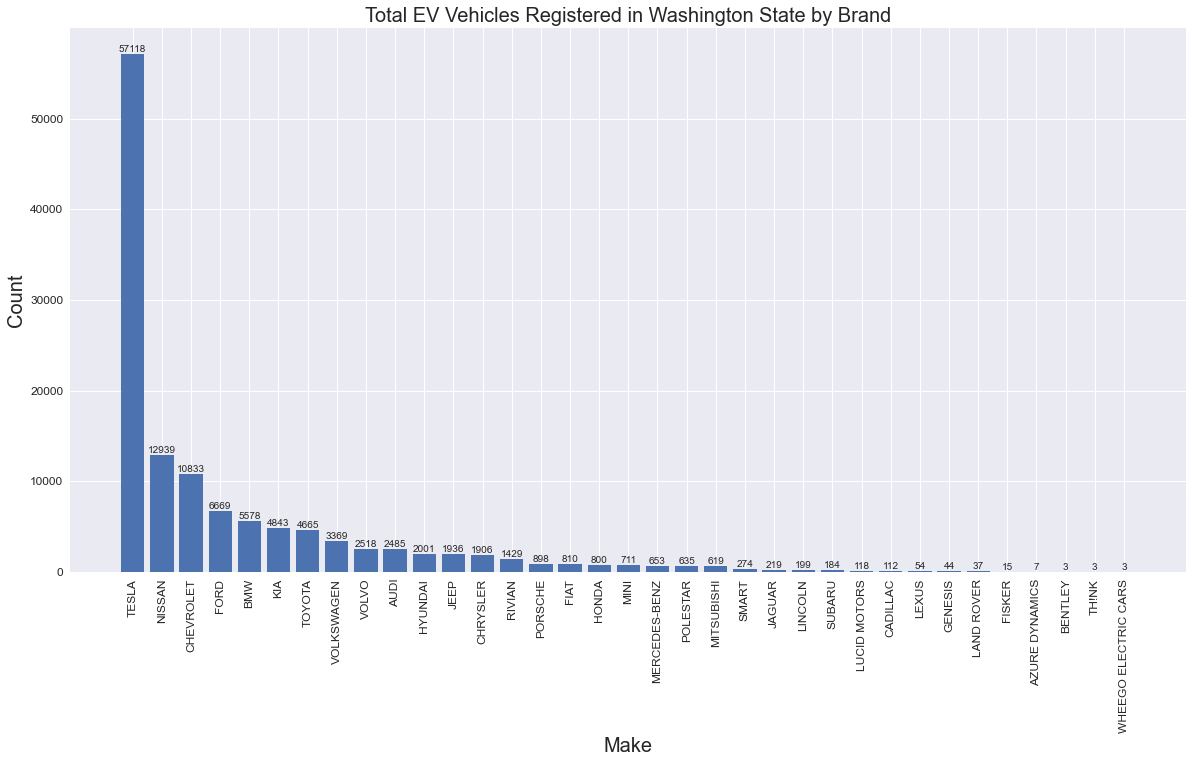

<Figure size 7200x2160 with 0 Axes>

In [33]:
# Plotting the total number of vehicles sold per brand

# Defining the size of the graph.
plt.figure(figsize = (20, 10))

# Subsetting the origianl dataframe by column and counting unique rows. 
valuesdf = EVs_by_Population['Make'].value_counts()

# Creating bar plot, indexing and assigning the total values to the plot.
bars = plt.bar(valuesdf.index, valuesdf.values)

# Add text to bars and defining the width and size of font
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Add labels to the axes and defining font size 
plt.xlabel('Make', fontsize=20)
plt.ylabel('Count', fontsize=20) 
plt.title('Total EV Vehicles Registered in Washington State by Brand', fontsize=20)

# Rotating the x-axis labels to prevent overlapping. 
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

figr = plt.figure()
figr.set_figheight(30)
figr.set_figwidth(100)

plt.show()

In [34]:
# Plot 2 - Tesla’s Sold vs Other Brands

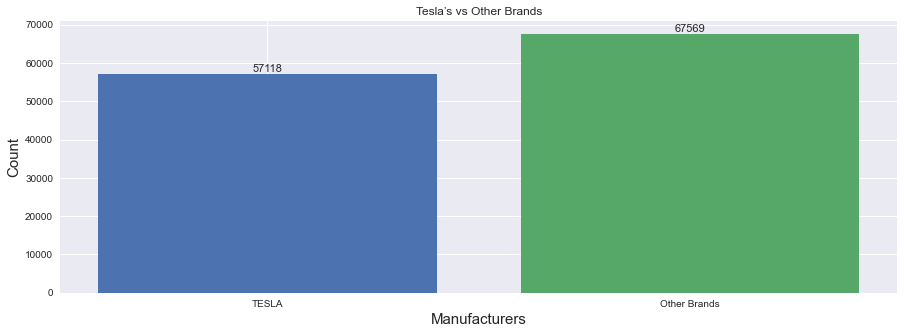

In [35]:
# Creating the tesla_df dataframe to subset the data by make and 
# Outputting only vehicles sold by Tesla.
tesla_df = EVs_by_Population[EVs_by_Population["Make"] == 'TESLA']

# Creating the Others_df dataframe to subset the data by make and 
# Outputting only vehicles sold by brands other than Tesla.
Others_df = EVs_by_Population[EVs_by_Population["Make"] != 'TESLA']

# Defining the size of the graph.
plt.figure(figsize = (15, 5))

# Counting all Tesla models  registered.
tesla_counts = tesla_df.Make.value_counts()

# Counting all other models registered.
others_counts = len(Others_df)

# Defining how both bars count the data used for this plot.
bars_t = plt.bar(tesla_counts.index, tesla_counts.values, label='Tesla')
bars_o = plt.bar('Other Brands', others_counts, label='Other Brands')


# Defining the axis labels and the size of the text in the axis labels.
plt.xlabel('Manufacturers', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Tesla’s vs Other Brands')

# Displaying total values in text at the top of each data column.
for bar in bars_t:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval),
             ha='center', va='bottom', fontsize=11)
    
    yval_o = bars_o[0].get_height()
    plt.text(bars_o[0].get_x() + bars_o[0].get_width()/2.0, yval_o, int(yval_o),
             ha='center', va='bottom', fontsize=11)
    
plt.xticks(rotation = 0)

plt.show()

In [36]:
# Plot 3 - Vehicle Registration by Model.

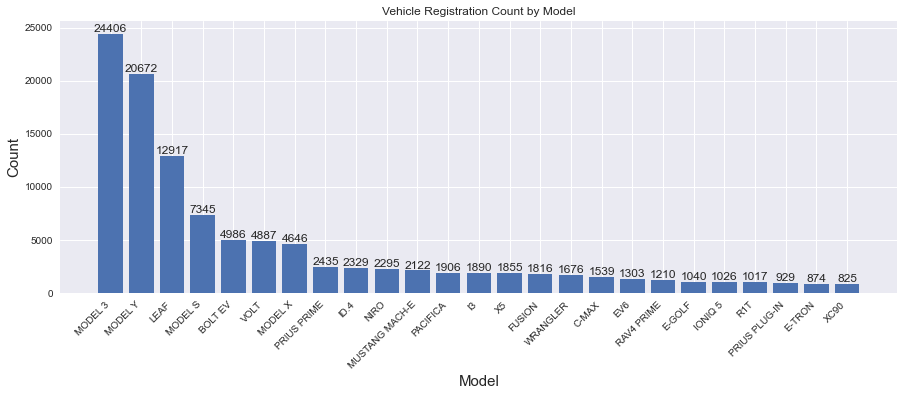

In [37]:
# Defining the size of the graph.
plt.figure(figsize = (15, 5))

# Plotting the total number of vehicles sold per brand
Registration_by_Model = EVs_by_Population['Model'].value_counts().head(25)

# Creating bar plot, indexing and assigning the total values to the plot.
bars = plt.bar(Registration_by_Model.index, Registration_by_Model.values)

# Displaying total values in text at the top of each data column.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), ha='center', va='bottom', fontsize=12)

    
# Defining the axis labels and the size of the text in the axis labels.
plt.xlabel('Model', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Plot Title
plt.title('Vehicle Registration Count by Model')

# Rotating the x data labels (Vehicle Models) by 45 degrees and 
# moving the text so that the end aligns with the x marker on the graph 
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [38]:
# Subsetting

In [39]:
# Subsetting columns from the original dataset.
# Displaying the first 10 rows.
EVs_by_Population[["Make", "Model"]].head(10)

,Make,Model
376,AUDI,A3
1079,AUDI,A3
1393,AUDI,A3
1551,AUDI,A3
1664,AUDI,A3
1812,AUDI,A3
1971,AUDI,A3
2599,AUDI,A3
2739,AUDI,A3
3328,AUDI,A3


In [40]:
# Subsetting columns from the original dataset.
# Displaying the last 10 rows.
EVs_by_Population[["Make", "Model"]].tail(10)

,Make,Model
121595,VOLVO,No Data
121654,VOLVO,No Data
121885,VOLVO,C40
122264,VOLVO,No Data
122946,VOLVO,C40
123855,VOLVO,No Data
124399,VOLVO,S90
25759,WHEEGO ELECTRIC CARS,WHEEGO
38828,WHEEGO ELECTRIC CARS,WHEEGO
113139,WHEEGO ELECTRIC CARS,WHEEGO


In [41]:
# Sorting

In [42]:
# Sorting subsetted data and displaying them from largest to smallest
EVs_by_Population.sort_values(by=['Electric Range'], ascending=False)

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility
23939,TESLA,MODEL S,Pierce,Lakewood,WA,2020,BEV,542,128568478,POINT (-122.54795 47.17997),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
64998,TESLA,MODEL S,King,Mercer Island,WA,2020,BEV,542,2217344,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
71736,TESLA,MODEL S,King,Tukwila,WA,2020,BEV,542,125903711,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
84256,TESLA,MODEL S,King,Seattle,WA,2020,BEV,542,4687126,POINT (-122.36894 47.54704),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
8742,TESLA,MODEL S,King,Seattle,WA,2020,BEV,542,103376703,POINT (-122.31307 47.66127),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...
86973,TESLA,MODEL S,Clark,Battle Ground,WA,2021,BEV,0,179241352,POINT (-122.5331 45.78092),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
86978,TESLA,MODEL Y,Skagit,La Conner,WA,2021,BEV,0,148102461,POINT (-122.49724 48.38874),PUGET SOUND ENERGY INC
86986,TESLA,MODEL Y,King,Kirkland,WA,2021,BEV,0,169420674,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
86987,TESLA,MODEL Y,King,Seattle,WA,2021,BEV,0,167110310,POINT (-122.34223 47.61085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [43]:
# Grouping

In [44]:
# This checks the number of rows in the data set associated with each Electric Range value.
# It also displays the distinct count of different ranges across the brands at the bottom

EVs_by_Population.groupby('Electric Range').count()

,Make,Model,County,City,State,Year,EV Type,Vehicle ID,Vehicle Location,Electric Utility
Electric Range,,,,,,,,,,
0,49674,49674,49674,49674,49674,49674,49674,49674,49674,49674
10,929,929,929,929,929,929,929,929,929,929
13,42,42,42,42,42,42,42,42,42,42
14,20,20,20,20,20,20,20,20,20,20
16,163,163,163,163,163,163,163,163,163,163
...,...,...,...,...,...,...,...,...,...,...
472,417,417,417,417,417,417,417,417,417,417
496,490,490,490,490,490,490,490,490,490,490
518,1666,1666,1666,1666,1666,1666,1666,1666,1666,1666


In [45]:
# Plot 4  - Electric Range by Model

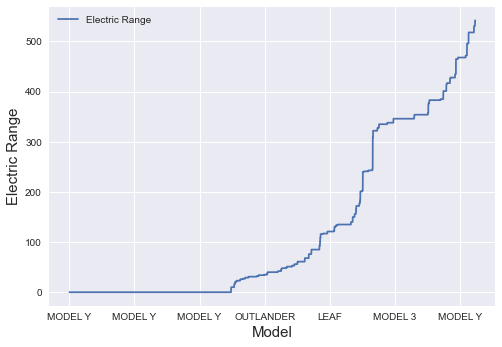

In [46]:
# Subsetting the original dataframe while creating a list of columns to subset.
# model_range = EVs_by_Population[['Model', 'Electric Range']]

# Creating the datafraem
model_ranges = EVs_by_Population[['Model', 'Electric Range']].sort_values('Electric Range')

# Plotting the total number of vehicles sold per brand
model_ranges.plot(x='Model', y='Electric Range', kind='line')

# Defining the axis labels and the size of the text in the axis labels.
plt.xlabel('Model', fontsize=15)
plt.ylabel('Electric Range', fontsize=15)

plt.show()

In [47]:
# What is the most popular electric vehicle type.

In [48]:
# Extracting the unique values for vehicle type into an array.
EVs_by_Population['EV Type'].unique()

array(['PHEV', 'BEV'], dtype=object)

In [49]:
# Plot 5 - Most Popular Electric Vehicle Type.

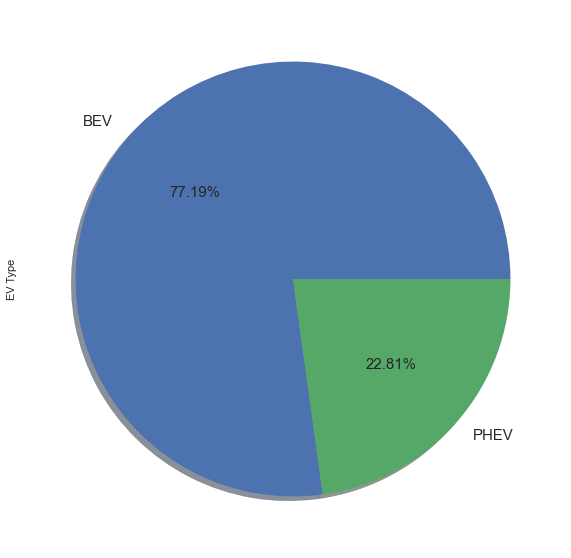

In [50]:
# Plotting the results of the unique values for vehicle type into a pie chart.

# Defining the size of the graph.
plt.figure(figsize = (20, 10))

# Counting the different types of Electric Vehicles in the data.
# Subsetting the original dataframe.
# Plotting the subsetted dataframe.
# Adding the percentage value of each wedge.
EVs_by_Population['EV Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, fontsize=15)

# Showing the Plot
plt.show()

In [51]:
# New Data Set

In [52]:
# Data Ingestion

In [53]:
# Reading the EVs_by_State raw csv file.

EVs_by_State = pd.read_csv(r'/Users/graydx2/Downloads/Data Analytics Course/EVs_by_State.csv')
EVs_by_State.head()

,State,Registration Count
0,Alabama,4750
1,Alaska,1290
2,Arizona,40740
3,Arkansas,2390
4,California,563070


In [54]:
# Dataset Information 

In [55]:
# Checking the information in the dataset.
EVs_by_State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Registration Count  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [56]:
# Illustrate the shape of the data file 
# Output is (Rows, Columns)

EVs_by_State.shape

(51, 2)

In [57]:
# Below are the descriptions of the column names.

# State: US state of vehicle registration 
# Registration Count: Count of US BEV vehicle registrations

EVs_by_State.columns

Index(['State', 'Registration Count'], dtype='object')

In [58]:
# Data Cleaning

In [59]:
# Checking for duplicates and doing a count of duplicates in this dataset
EVs_by_State.duplicated().sum()

0

In [60]:
# The number of nulls in the dataset.
EVs_by_State.isnull().sum()

State                 0
Registration Count    0
dtype: int64

In [61]:
# Plotting Second Dataset

In [62]:
# Plot 6 – EV’s by State   

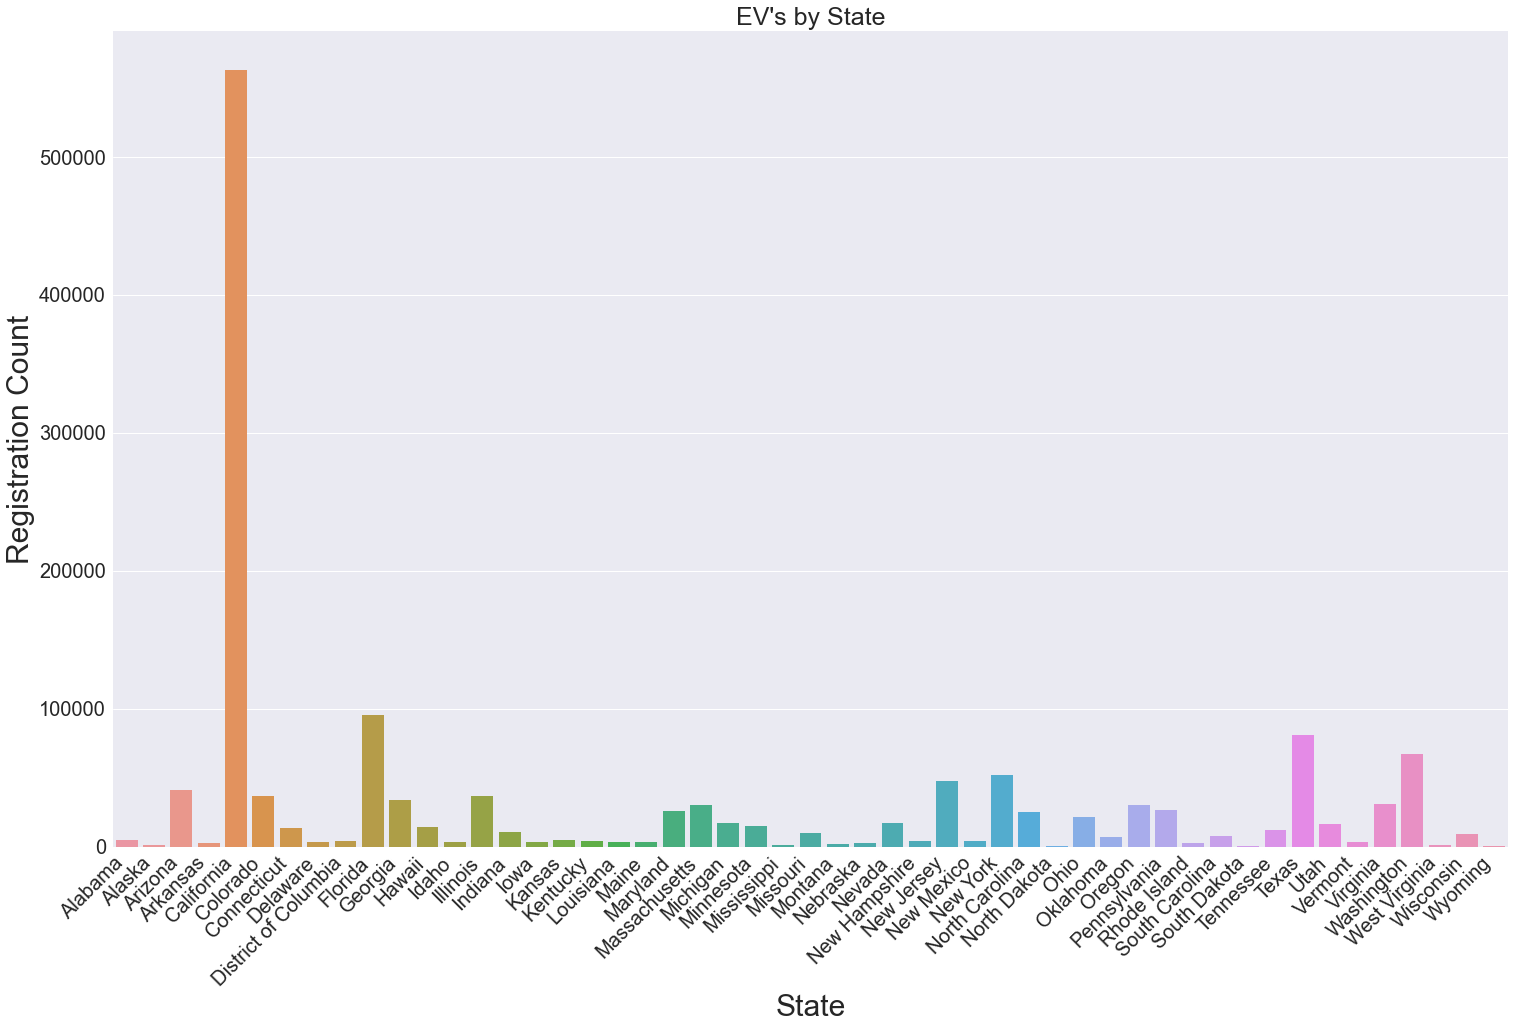

In [63]:
# Defining the size of the graph.
plt.figure(figsize = (25, 15))

# Calling new dataframe and using an sns plot.
# Defining the columns to subset for the X and Y axis.
EVs_by_state_chart = sns.barplot(x=EVs_by_State['State'], y=EVs_by_State['Registration Count'])

# Adding a title to the plot and defing font size.
EVs_by_state_chart.axes.set_title("EV's by State",fontsize=25)

# Adding an X axis label to the plot and defining the font size.
EVs_by_state_chart.set_xlabel("State",fontsize=30)

# Adding an Y axis label to the plot and defining the font size.
EVs_by_state_chart.set_ylabel("Registration Count",fontsize=30)

# Assigning the font size for the labels.
EVs_by_state_chart.tick_params(labelsize=20)

# Rotating the x data labels (Vehicle Models) by 45 degrees and 
# moving the text so that the end aligns with the x marker on the graph 
plt.xticks(rotation = 45, ha = 'right')

plt.show()

In [64]:
# Vehicle Locations

In [65]:
# Recording the total number of unique vehicle GPS locations.
# nunique()) returns the number of unique values from the "Vehicle Location" column.
print("Number of Locations:",EVs_by_Population['Vehicle Location'].nunique())

Number of Locations: 768


In [66]:
# Printing the locations that have the most vehicles.
# The “nlargest()"" function displays the data from largest in descending order. 
print("Locations With Most Vehicles:\n",EVs_by_Population['Vehicle Location'].value_counts().nlargest(10))

Locations With Most Vehicles:
 POINT (-122.13158 47.67858)    3247
POINT (-122.2066 47.67887)     2233
POINT (-122.21061 47.83448)    2161
POINT (-122.1872 47.61001)     2140
POINT (-122.12096 47.55584)    2049
POINT (-122.31765 47.70013)    2016
POINT (-122.15545 47.75448)    1834
POINT (-122.21238 47.57816)    1827
POINT (-122.02054 47.60326)    1792
POINT (-122.22901 47.72201)    1734
Name: Vehicle Location, dtype: int64


In [67]:
# Printing the locations that have the lowest vehicles.
# The  “nsmallest()"" function displays the data from smallest in ascending order.
print("Location with Least Vehicles:\n",EVs_by_Population['Vehicle Location'].value_counts().nsmallest(10))

Location with Least Vehicles:
 POINT (-117.57228 47.99685)    1
POINT (-77.23717 39.17915)     1
POINT (-117.37445 33.21097)    1
POINT (-83.97862 33.61951)     1
POINT (-97.74353 31.4349)      1
POINT (-76.29676 36.86523)     1
POINT (-82.17029 27.86266)     1
POINT (-77.04405 38.92033)     1
POINT (-76.66004 34.7192)      1
POINT (-80.34689 33.95059)     1
Name: Vehicle Location, dtype: int64


In [68]:
# Custom functions to create reusable code

In [69]:
# Creating a function called "calculate_total_models_sold", defining the parameters as df and brand.
# Creating a “brand_df” dataframe and subsetting the original dataframe by “Model”.
# df will be substituted in the output with “EVs_by_Population”.
# Counting the number of unique values from the model column into a new dataframe.
# Returning the number of unique values from the model column.

def calculate_total_models_sold(df, brand):
    brand_df = df[df['Make'] == brand]
    total_models_sold = brand_df['Model'].nunique()
    return total_models_sold

In [70]:
# Brands to select from for the filter below
EVs_by_Population.Make.unique()

array(['AUDI', 'AZURE DYNAMICS', 'BENTLEY', 'BMW', 'CADILLAC',
       'CHEVROLET', 'CHRYSLER', 'FIAT', 'FISKER', 'FORD', 'GENESIS',
       'HONDA', 'HYUNDAI', 'JAGUAR', 'JEEP', 'KIA', 'LAND ROVER', 'LEXUS',
       'LINCOLN', 'LUCID MOTORS', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI',
       'NISSAN', 'POLESTAR', 'PORSCHE', 'RIVIAN', 'SMART', 'SUBARU',
       'TESLA', 'TH!NK', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO',
       'WHEEGO ELECTRIC CARS'], dtype=object)

In [71]:
# Output: Number of unique Brand models sold

# Note: Brand type is case sensitive and should be typed in all Capitals , see above.

# Input the required make to be filtered by inside the apostrophes

total = calculate_total_models_sold(EVs_by_Population, 'SMART')
print(total)  

3


In [72]:
# Assigning a Range Category

In [73]:
# Creating a function called "EV_Range_Cat", defining the parameters as EVs_by_Population and the column Electric Range.
# Passing Electic_range into the categorize_range function.
# If then Else statement programmed to return a category based on range values.

def create_EV_Range_Cat(EVs_by_Population, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "No Value"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

# Creating an extra column in the EVs_by_Population dataframe and 
# Instructing the code to populate the new column with range categories based on stated ranges

    EVs_by_Population['EV_Range_Cat'] = EVs_by_Population[column].apply(categorize_range)
    return EVs_by_Population

Range_Cat = create_EV_Range_Cat(EVs_by_Population, column='Electric Range')
Range_Cat

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility,EV_Range_Cat
376,AUDI,A3,King,Medina,WA,2016,PHEV,26,257108232,POINT (-122.23892 47.61613),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Short
1079,AUDI,A3,King,Seattle,WA,2016,PHEV,26,205653885,POINT (-122.3026 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Short
1393,AUDI,A3,King,Seattle,WA,2016,PHEV,26,253471067,POINT (-122.31765 47.70013),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Short
1551,AUDI,A3,Snohomish,Bothell,WA,2016,PHEV,26,222389436,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,Short
1664,AUDI,A3,King,Seattle,WA,2016,PHEV,26,105649729,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Short
...,...,...,...,...,...,...,...,...,...,...,...,...
123855,VOLVO,No Data,King,Seattle,WA,2023,BEV,0,225775693,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),No Value
124399,VOLVO,S90,King,Federal Way,WA,2023,PHEV,61,230063375,POINT (-122.35206 47.30297),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Short
25759,WHEEGO ELECTRIC CARS,WHEEGO,Pierce,Tacoma,WA,2010,PHEV,161,143716758,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Medium
38828,WHEEGO ELECTRIC CARS,WHEEGO,Thurston,Olympia,WA,2010,PHEV,161,244618104,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,Medium


In [74]:
Range_Cat = Range_Cat[Range_Cat['EV_Range_Cat'].str.contains('No Value') == False]
Range_Cat     

,Make,Model,County,City,State,Year,EV Type,Electric Range,Vehicle ID,Vehicle Location,Electric Utility,EV_Range_Cat
376,AUDI,A3,King,Medina,WA,2016,PHEV,26,257108232,POINT (-122.23892 47.61613),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Short
1079,AUDI,A3,King,Seattle,WA,2016,PHEV,26,205653885,POINT (-122.3026 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Short
1393,AUDI,A3,King,Seattle,WA,2016,PHEV,26,253471067,POINT (-122.31765 47.70013),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Short
1551,AUDI,A3,Snohomish,Bothell,WA,2016,PHEV,26,222389436,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,Short
1664,AUDI,A3,King,Seattle,WA,2016,PHEV,26,105649729,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),Short
...,...,...,...,...,...,...,...,...,...,...,...,...
124539,VOLVO,XC60,Whatcom,Bellingham,WA,2022,PHEV,29,194914688,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,Short
124399,VOLVO,S90,King,Federal Way,WA,2023,PHEV,61,230063375,POINT (-122.35206 47.30297),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Short
25759,WHEEGO ELECTRIC CARS,WHEEGO,Pierce,Tacoma,WA,2010,PHEV,161,143716758,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Medium
38828,WHEEGO ELECTRIC CARS,WHEEGO,Thurston,Olympia,WA,2010,PHEV,161,244618104,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,Medium


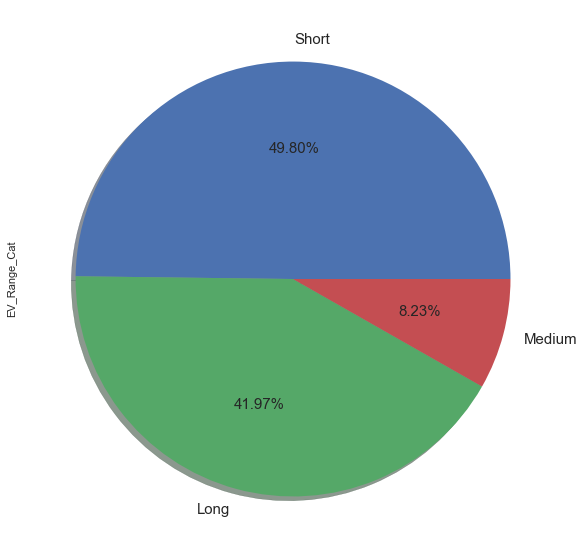

In [75]:
# Plotting the results of the unique values for vehicle type into a pie chart.

# Defining the size of the graph.
plt.figure(figsize = (20, 10))

# Counting the different range categories in the data.
# Subsetting the original dataframe.
# Plotting the subsetted dataframe.
# Adding the percentage value of each wedge.
Range_Cat['EV_Range_Cat'].value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, fontsize=15)

# Showing the Plot
plt.show()